# **Comp 5130 Project**

# K-Means Clustering

## Authors: Kevin Dong, Maci Hadley, Marshall Nelson

### Dr. Yang Zhou


### **Imports** 
Jupyter Notebook used for visual appearance and simplicity
Numpy used to handle data and math
Matplotlib used to plot our results

**Installation:**  
pip install jupyter  
pip install numpy  
pip install matplotlib  


In [8]:
import numpy as np
import matplotlib.pyplot as plt

### **Load Dataset**  
We are using the simple circles dataset from UCIrvine

In [9]:
 # Define the file to open
file_path = 'circles.txt'

# Open the file and read coordinates
coordinates = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=(0, 1))

# Print out the list of coordinates
# print("Points:", coordinates)

### **Define K-Means Clustering Function**
Self-Implemented without using an external k-means library

#### **Process:**
**initialize_centroids:** Sets Centroids to 100 random points in the dataset

**assign_clusters:** each point to the closest centroid

**update_centroid:** Sets the centroid to the center of its cluster

In [10]:
def initialize_centroids(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    centroids = np.array(data[indices])
    return centroids

def assign_clusters(data, centroids):
    # Assign each point to the nearest centroid
    clusters = []
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1)
        nearest_centroid = np.argmin(distances)
        clusters.append(nearest_centroid)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    # Calculate new centroids as the mean of assigned points
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            # If a cluster has no points, reinitialize its centroid randomly
            new_centroids.append(data[np.random.choice(len(data))])
    return np.array(new_centroids)

        
            

### **Define K-Means Engine**

**Two Cases:**
1. Iterate through K-Means until a limit (100) is reached
2. Stop iterating after Centroids don't move within a set tolerance between iterations (1e-6)

In [11]:
def kmeans(data, k, max_iters=100, tol=1e-6):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        # Assign clusters
        clusters = assign_clusters(data, centroids)
        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Converged after {i+1} iterations.")
            break
        centroids = new_centroids
    return clusters, centroids

### **Perform K-Means**  
**k** defines the number of clusters, in this case k=100

In [12]:
k = 100
clusters, centroids = kmeans(coordinates, k)
#print(centroids)
#print(clusters)

Converged after 19 iterations.


Due to the random initialization, run time varies.  
However, Our implementation usually takes 1.13 seconds run. 

#### Plotting

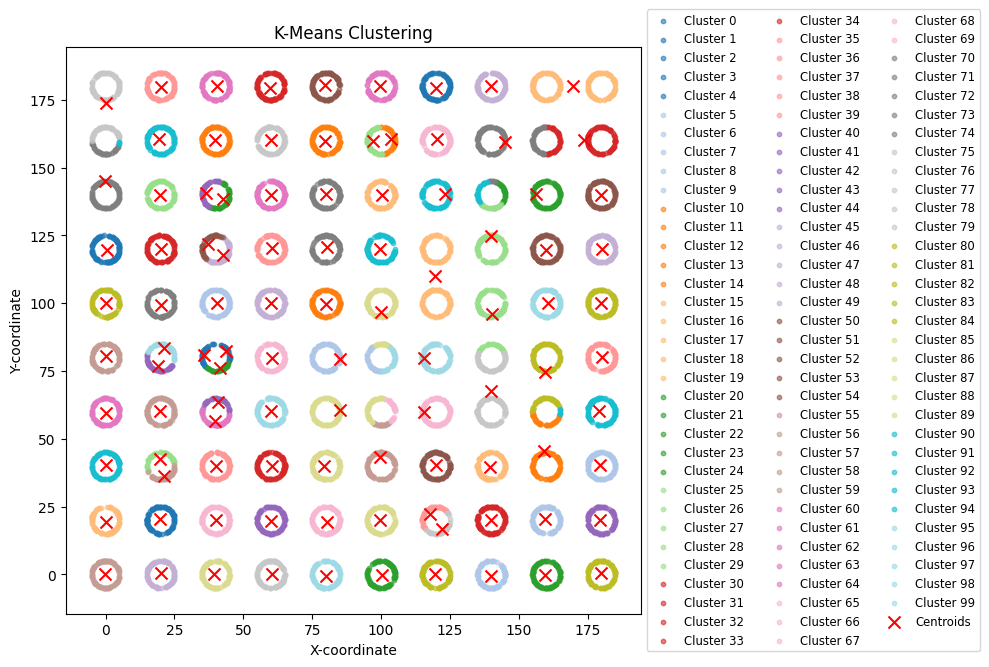

In [13]:
def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(10, 7))

    #Assign unique colors to clusters
    colors = plt.get_cmap("tab20", k)

    #Plotting each cluster
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    s=10, color=colors(cluster_id), label=f'Cluster {cluster_id}', alpha=0.6)

    #Plotting the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                s=75, color='red', marker='x', label='Centroids')

    
    #Add labels and legend
    plt.title("K-Means Clustering")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")

    #Move the legend outside the plot
    plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

    plt.tight_layout()  
    plt.show()

clusters = np.array(clusters)

plot_clusters(coordinates, clusters, centroids, k)


### **Comparison of Results** 
#### **Test 1 Output**
![Test 1](TestOutput1.png)  
#### **Test 2 Output**  
![Test 2](TestOutput2.png)  

### **Analysis of Results**  
Due to the random initialization of clusters, each time k-means is run the result is different.  
  
Additionally, it is very obvious that our algorithm is not perfect. Due to random initialization some circles have multiple clusters, some clusters are between multiple circles, and some clusters are perfect.

Our suggestion is to implement a method to systematically initialize clusters to reduce output variability. This should also greatly improve clustering performance